# Wprowadzenie do pracy w Google Colab
Google Colab bazuje na Jupyter Notebook.

**Aby uruchomić kod kliknij we fragment kodu i wciśnij Ctrl+Enter**
## Import pakietów
Punktem wyjścia do prac będa pakiety numpy, pandas i csv umozliwiajace kolejno: wygodne obliczenia i operacje na wektorach, reprezenacje i wizualizację dużych porcji danych, wczytywanie danych treningowych z formatu CSV.
Oprócz tego w przypadku korzystania z Google Colab koniecznym będze import modułów pozwalajacych na upload plików z danymi treningowymi na serwer.

In [ ]:
import pandas as pd
import numpy as np
import csv
from google.colab import files
import io

## Podstawy podstaw Pythona
(Pomiń to jeśli wiesz o Pythonie cokolwiek)
Python jest jednym z najpopularniejszych (obok R) językiem wykorzystywanym w szeroko rozumianej Data Science.
W Pythonie możliwe jest programowanie obiektowe, programowanie strukturalne i programowanie funkcyjne. Typy sprawdzane są dynamicznie, a do zarządzania pamięcią stosuje się garbage collection.

Dla osób, które nie miały nigdy nic wspólnego z Pythonem, sugeruję przejrzenie [Tutorialu](https://docs.python.org/3/tutorial/) i innych materiałów dostępnych w sieci.

In [ ]:
# deklaracja zmiennych -- dynamiczne typowanie
x=12
y='tekst'

# Python ma silne typowanie --  przy wypisywaniu zmiennych numerycznych i
# konkatenacji ze stringiem, konieczna jest konwersja explicite do string
print('To są moje zmienne: '+str(x)+' '+y)

# Listy zapisuje się w notacji podobnej do Prologa, Matlaba, Octava
lista = [1,2,3,4.5]
print('to lista '+str(lista))

# Mimo, że Python jest językiem (również) obiektowym, to wiele funkcji
# uzywanych jest jak globalne

dl = len(lista)
print('Długośćlisty to: '+str(dl))

# Pętle i instrukcje warunkowe (wcięcia są ważne!)
for element in lista:
  print(element)

if x < 10:
  print('Mniejsze od 10')
else:
  print('Może 10, może wiecej')


To są moje zmienne: 12 tekst
to lista [1, 2, 3, 4.5]
Długośćlisty to: 4
1
2
3
4.5
Może 10, może wiecej


In [ ]:
# Iterowanie po elementach listy a wydajność
duza_lista = np.random.randint(2, size=10000000)

# Policz ile jest 1-nek
import time

start = time.time()
print(len(duza_lista[duza_lista==1]))
stop = time.time()
print('Czas wykonania: ' + str(stop-start))

start = time.time()
print(sum([1 for e in duza_lista if e == 1]))
s = 0
stop = time.time()
print('Czas wykonania: ' + str(stop-start))


start = time.time()
for e in duza_lista:
  if e == 1: s+=1
print(s)
stop = time.time()
print('Czas wykonania: ' + str(stop-start))


5002541
Czas wykonania: 0.11101007461547852
5002541
Czas wykonania: 2.405383586883545
5002541
Czas wykonania: 4.284901857376099


In [ ]:
# Definiowanie funkcji -- nigdy nie staraj się definiowac funkcji, które już są.
def srednia(lista):
  return sum(lista)/len(lista)

start = time.time()
print('Srednia z listy to '+str(srednia(duza_lista)))
stop = time.time()
print('Czas wykonania: ' + str(stop-start))

start = time.time()
print('Srednia z listy to '+str(np.mean(duza_lista)))
stop = time.time()
print('Czas wykonania: ' + str(stop-start))

Srednia z listy to 0.5002541
Czas wykonania: 0.8447220325469971
Srednia z listy to 0.5002541
Czas wykonania: 0.01403665542602539


In [ ]:
# Słowniki to tablice asocjacyjne
dict = {'Name': 'Zara', 'Age': 21, 'Class': 'Machine Learning'}
dict['Age'] = 22; # update existing entry
dict['School'] = "UJ"; # Add new entry

print("dict['Age']: ", dict['Age'])
print("dict['School']: ", dict['School'])

dict['Age']:  22
dict['School']:  UJ


## Wczytywanie plików
Poniżej przyklad wczytania pliku z danymi treningowymi, załadowania go do DataFrame i wyświetlenia.
Zwróć uwagę, że podczas uploadu można wybrać więcej plików niż jeden.
Plik, który należy załadować znajdue się tutaj [House sales](https://pegaz.uj.edu.pl/mod/resource/view.php?id=1872227)

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['kc_house_data.csv'].decode('utf-8')))

KeyboardInterrupt: 

### Lokalnie
Jeśli pracujesz lokalnie na swoim własnym jupyter notebook, to wczytujemy analogicznie ale bez uploadu i dekodowania

In [ ]:
df = pd.read_csv('https://szymon.bobek.re/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Manipulowanie DataFrame
Wybieranie danych z DF odbywa sie intuicyjnie, poprzez podanie nazwy kolumny, lub listy kolumn w **nawiasach kwadratowych**

       sqft_living     price
0             1180  221900.0
1             2570  538000.0
2              770  180000.0
3             1960  604000.0
4             1680  510000.0
...            ...       ...
21608         1530  360000.0
21609         2310  400000.0
21610         1020  402101.0
21611         1600  400000.0
21612         1020  325000.0

[21613 rows x 2 columns]


<Axes: xlabel='sqft_living', ylabel='price'>

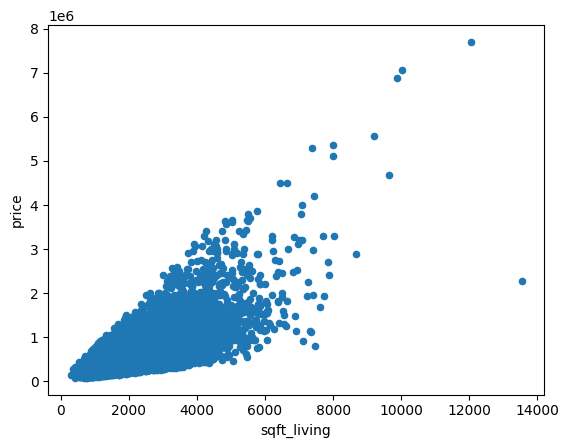

In [ ]:
# wybierz tylko jedną kolumnę
import pandas as pd

df = pd.read_csv('https://szymon.bobek.re/kc_house_data.csv')
bedrooms = df['sqft_living']

# wybierz dwie kolumny
bedprice = df[['sqft_living', 'price']]


# zrób wykres ceny względem powierzchni
bedprice.plot.scatter(x='sqft_living',y='price')

In [ ]:
# Indeksy -- każdy wiersz jest indeksowany domyślnie integerem.
bedprice.index
print('Here is what we have at the index 1210: ')
print(bedprice.loc[1210])
print('---------------------')
print(bedprice.iloc[1210])


Here is what we have at the index 1210: 
sqft_living      1760.0
price          585000.0
Name: 1210, dtype: float64
---------------------
sqft_living      1760.0
price          585000.0
Name: 1210, dtype: float64


In [ ]:
# Zmiana indeksowania może generować nieoczekiwane wyniki podczas wybierania danych

bedprice.set_index('sqft_living', inplace=True)
print('Here is what we have at the index 1210: ')
print(bedprice.loc[1210])
print(bedprice.iloc[1210])


Here is what we have at the index 1210: 
                price
sqft_living          
1210         290000.0
1210         529000.0
1210         200000.0
1210         380000.0
1210         510000.0
...               ...
1210         437500.0
1210         500000.0
1210         610000.0
1210         461100.0
1210         414500.0

[88 rows x 1 columns]
price    585000.0
Name: 1760, dtype: float64


In [38]:
# Tworzymy nową dataframe z nowymi danymi z wykorzystaniem Series
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

df = pd.DataFrame({ 'City name': city_names, 'Population': population })
df

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [ ]:
# Worzymy nową z wykorzystaniem słowników
df = pd.DataFrame({'x': ['Pierwszy','Drugi'], 'y':[222,333]})
df

,x,y
0,Pierwszy,222
1,Drugi,333


In [ ]:
#Modyfikujemy oryginalną mimo, że możemy podejrzewać, że tak się nie stanie
df = pd.DataFrame({'x': ['Pierwszy','Drugi'], 'y':[222,333]})
df_sub = df[0:1]
df_sub.x = 'Trzeci'
print(df)
print(df_sub)


        x    y
0  Trzeci  222
1   Drugi  333
        x    y
0  Trzeci  222


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
#Jeśil chcemy pracować na kopii, to explicite:
df = pd.DataFrame({'x': ['Pierwszy','Drugi'], 'y':[222,333]})
df_sub = df[0:1].copy()
df_sub.x = 'Trzeci'
print(df)
print(df_sub)


          x    y
0  Pierwszy  222
1     Drugi  333
        x    y
0  Trzeci  222


In [ ]:

#Yikes... Nie wiadomo co się stanie -- raz wartość w df zostanie zmieniona, raz nie
df = pd.DataFrame({'x': ['Pierwszy','Drugi'], 'y':[222,333]})
df_sub = df[['x','y']]
df_sub['x'][0] = 'Czwarty'
print(df)
print(df_sub)



          x    y
0  Pierwszy  222
1     Drugi  333
         x    y
0  Czwarty  222
1    Drugi  333


<ipython-input-21-2847c21a1af3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['x'][0] = 'Czwarty'


In [ ]:
# Dodanie nowej kolumny do DF, z domyślną wartością
df = pd.DataFrame({'x': ['Pierwszy','Drugi'], 'y':[222,333]})
df['Z'] = -1
df.loc[:,'Kolejna'] = -2
df

,x,y,Z,Kolejna
0,Pierwszy,222,-1,-2
1,Drugi,333,-1,-2


In [ ]:
#Zmiana wartości poprawnie to uzywamy loc.
#Unikamy tzw. chained indexing [a][b][c] na rzecz loc[a,b,c]:
df = pd.DataFrame({'x': ['Pierwszy','Drugi'], 'y':[222,333]})
df_sub = df[['x','y']]
df_sub.loc[0,'x'] = 'Piąty'
print(df)
print(df_sub)

          x    y
0  Pierwszy  222
1     Drugi  333
       x    y
0  Piąty  222
1  Drugi  333


In [ ]:
# Iterowanie po wierszach DF różni sie trochę od iterowania po listach
df = pd.read_csv('https://szymon.bobek.re/kc_house_data.csv')
bedprice = df[['sqft_living', 'price']]
# nie o to nam chodziło (nagłówek tez jest wierszem)
for row in bedprice:
  print('Powierzchnia: '+str(row[0]), 'cena: '+str(row[1]))

# nieźle i wygodnie
for idx, row in bedprice.iterrows():
  print('Powierzchnia: '+str(row['sqft_living']), 'cena: '+str(row['price']))

# czasem o niebo szybciej niż powyższe
for row in bedprice.itertuples():
  print('Powierzchnia: '+str(getattr(row,'sqft_living')), 'cena: '+str(getattr(row,'price')))



## Operacje na wektorach
Do operacji na wektorach można używac wymiennie pakietu numpy, albo Pandas.

In [ ]:
# iloczyn skalarny kolumny 'price' z użyciem Pandas
res = df['price'].dot(df['price'])
print(res)

# iloczyn skalarny kolumny 'price' z użyciem numpy
# values zwraca surową tablicę numpy
numpy_vals = df['price'].values
res = numpy_vals.dot(numpy_vals)
print(res)


9217325138472070.0
9217325138472070.0


In [ ]:
# Z numpy możemy wygodnie manipulować danymi w formacie Matlabowym
#matrix = df.as_matrix(columns=['sqft_living','bedrooms',	'bathrooms','price'])
matrix = df[['sqft_living','bedrooms',	'bathrooms','price']].values
print(matrix)

# tylko dwie pierwsze kolumny
print('Kolumny')
print(matrix[:,0:2])

# tylko dwa pierwse wiersze
print('Wiersze')
print(matrix[0:2,:])

[[1.18000e+03 3.00000e+00 1.00000e+00 2.21900e+05]
 [2.57000e+03 3.00000e+00 2.25000e+00 5.38000e+05]
 [7.70000e+02 2.00000e+00 1.00000e+00 1.80000e+05]
 ...
 [1.02000e+03 2.00000e+00 7.50000e-01 4.02101e+05]
 [1.60000e+03 3.00000e+00 2.50000e+00 4.00000e+05]
 [1.02000e+03 2.00000e+00 7.50000e-01 3.25000e+05]]
Kolumny
[[1.18e+03 3.00e+00]
 [2.57e+03 3.00e+00]
 [7.70e+02 2.00e+00]
 ...
 [1.02e+03 2.00e+00]
 [1.60e+03 3.00e+00]
 [1.02e+03 2.00e+00]]
Wiersze
[[1.180e+03 3.000e+00 1.000e+00 2.219e+05]
 [2.570e+03 3.000e+00 2.250e+00 5.380e+05]]


# Zadania
## Wczytaj plik z danymi, który znajduje się tutaj: [House sales - real dataset]('https://szymon.bobek.re/kc_house_data_moreal_full.csv')

**Zwróć uwagę, że niektórych danych brakuje** Nie są to jednak typowe dla Pandas i Numpy `np.NaN`. Plik znajduje sie również pod adresem: `https://szymon.bobek.re/kc_house_data_moreal_full.csv`

Możesz postąpić z tymi danymi w następujacy sposób
  1. Zastąpić brakujące wartości je wartośćią `np.NaN`
  2. Usunąć rekordy z brakujacymi danymi
  3. Uzupełnić je średnią, mediana, lub dominantą
  4. Zastosować coś bardziej fancy, np. [Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)


In [39]:
import pandas as pd
import numpy as np
import csv
import io
from sklearn.impute import SimpleImputer

df = pd.read_csv('https://szymon.bobek.re/kc_house_data.csv')
for row in range(len(df['bathrooms'])):
  if (df.loc[row,'bathrooms']!=int(df.loc[row,'bathrooms'])):
    df.loc[row,'bathrooms'] = "NaN"
  if (df.loc[row,'floors'] != int(df.loc[row,'floors'])):
    df.loc[row,'floors'] = "NaN"
bathrooms = df[['bathrooms']]
print(bathrooms)
imp = SimpleImputer(missing_values="NaN", strategy='most_frequent')
imp.fit(bathrooms)
df['bathrooms']= imp.fit_transform(bathrooms)
floors = df[['floors']]
imp.fit(floors)
df['floors']= imp.fit_transform(floors)
print(df)



      bathrooms
0           1.0
1           NaN
2           1.0
3           3.0
4           2.0
...         ...
21608       NaN
21609       NaN
21610       NaN
21611       NaN
21612       NaN

[21613 rows x 1 columns]
               id             date     price  bedrooms bathrooms  sqft_living  \
0      7129300520  20141013T000000  221900.0         3       1.0         1180   
1      6414100192  20141209T000000  538000.0         3       1.0         2570   
2      5631500400  20150225T000000  180000.0         2       1.0          770   
3      2487200875  20141209T000000  604000.0         4       3.0         1960   
4      1954400510  20150218T000000  510000.0         3       2.0         1680   
...           ...              ...       ...       ...       ...          ...   
21608   263000018  20140521T000000  360000.0         3       1.0         1530   
21609  6600060120  20150223T000000  400000.0         4       1.0         2310   
21610  1523300141  20140623T000000  402101.0         

## Ile jest elementów (wierszy) w zbiorze? A ile jest kolumn (cech)?

In [ ]:
columns = 0
rows = len(df)
for i in df:
  columns += 1

print("Kolumn jest " + str(columns) + " a wierszy jest: "+ str(rows))

Kolumn jest 21 a wierszy jest: 21613


## Wyświetl 10 pierwszych wierszy pliku

In [ ]:
print(df[0:10])

           id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7 

## Uwórz kopię DataFrame, która będzie zaierać 5 pierwszych kolumn
Upewnij się, że nowo utworzona struktura to faktycznie DataFrame. Można to zrobić:

``` python
type(newDataFrame)
```


In [ ]:
newdf = pd.DataFrame(df[['id','date','price',	'bedrooms','bathrooms']])
print(newdf)

               id             date     price  bedrooms  bathrooms
0      7129300520  20141013T000000  221900.0         3       1.00
1      6414100192  20141209T000000  538000.0         3       2.25
2      5631500400  20150225T000000  180000.0         2       1.00
3      2487200875  20141209T000000  604000.0         4       3.00
4      1954400510  20150218T000000  510000.0         3       2.00
...           ...              ...       ...       ...        ...
21608   263000018  20140521T000000  360000.0         3       2.50
21609  6600060120  20150223T000000  400000.0         4       2.50
21610  1523300141  20140623T000000  402101.0         2       0.75
21611   291310100  20150116T000000  400000.0         3       2.50
21612  1523300157  20141015T000000  325000.0         2       0.75

[21613 rows x 5 columns]


## W której obszarze identyfikowanym przez kod pocztowy sprzedano najwięcej domów?

In [ ]:
tempZipcode = df.groupby(by="zipcode", as_index=False).count()
countOfSoldHouses = pd.DataFrame({'zipcode':tempZipcode['zipcode'],'count':tempZipcode['id']}).sort_values(by="count",ascending=False)
print(countOfSoldHouses)

    zipcode  count
42    98103    602
23    98038    590
49    98115    583
28    98052    574
51    98117    553
..      ...    ...
41    98102    105
8     98010    100
14    98024     81
61    98148     57
24    98039     50

[70 rows x 2 columns]


## W której obszarze identyfikowanym przez kod pocztowy sprzedano najwięcej domów z przynajmniej dwoma łazienkami?

In [ ]:
df2 = df.loc[df["bathrooms"] >= 2 ]
temp = df2.groupby(by="zipcode", as_index=False).count()
countOfSoldHouses2 = pd.DataFrame({'zipcode':temp['zipcode'],'count':temp['id']}).sort_values(by="count",ascending=False)
print(countOfSoldHouses2)

    zipcode  count
42    98103    119
49    98115     95
52    98118     86
51    98117     78
23    98038     74
..      ...    ...
8     98010     12
24    98039      9
20    98032      9
14    98024      8
61    98148      6

[70 rows x 2 columns]


## Ile jest różnych obszarów identyfikowanych przez kod pocztowy?

In [ ]:
temp = df.groupby(by="zipcode", as_index=False).count()
print("Liczba obszarów identyfikowanych przez różne kody pocztowe: " + str(len(temp)))

Liczba obszarów identyfikowanych przez różne kody pocztowe: 70


## Jaki jest procentowy udział w ilości sprzedanych domów poszczególnych obszarów (identyfikowanych przez zipcode)

In [ ]:
tempZipcodeCount = df.groupby(by="zipcode", as_index=False).count()
sum = tempZipcodeCount.sum()['id']
countOfSoldHouses = pd.DataFrame({'zipcode':tempZipcodeCount['zipcode'],'count':tempZipcodeCount['id'], 'percentage': (tempZipcodeCount['id']*100)/sum}).sort_values(by="count",ascending=False)
print(countOfSoldHouses)

    zipcode  count  percentage
42    98103    602    2.785361
23    98038    590    2.729839
49    98115    583    2.697451
28    98052    574    2.655809
51    98117    553    2.558645
..      ...    ...         ...
41    98102    105    0.485819
8     98010    100    0.462684
14    98024     81    0.374774
61    98148     57    0.263730
24    98039     50    0.231342

[70 rows x 3 columns]


## Jaka jest największa, najmniejsza i średnia powierzchnia domu jaki został sprzedany?

In [ ]:
df['sqft_total'] = df['sqft_living'] + df['sqft_above'] + df['sqft_basement']
print('Największa powierzchnia domu jaki został sprzedany: ' + str(max(df['sqft_total'])))
print('Najmniejsza powierzchnia domu jaki został sprzedany: ' + str(min(df['sqft_total'])))
print('Średnia powierzchnia domu jaki został sprzedany: ' + str(df['sqft_total'].mean()))

Największa powierzchnia domu jaki został sprzedany: 27080
Najmniejsza powierzchnia domu jaki został sprzedany: 580
Średnia powierzchnia domu jaki został sprzedany: 4159.799472539675


## W jakim obszarze średnia powierzchnia sprzedanych domów jest największa/najmniejsza

In [ ]:
tempZipcodeAvg = df.groupby(by="zipcode", as_index=False).mean()
averageHouseSqft = pd.DataFrame({'zipcode':tempZipcodeAvg['zipcode'],'avg_sqft_total':tempZipcodeAvg['sqft_total']}).sort_values(by="avg_sqft_total",ascending=False)
print(averageHouseSqft)

    zipcode  avg_sqft_total
24    98039     7601.800000
25    98040     6213.666667
38    98075     6032.740947
3     98004     5818.044164
5     98006     5776.590361
..      ...             ...
61    98148     3221.052632
45    98107     3159.097744
56    98126     3087.192090
44    98106     2975.767164
64    98168     2937.249071

[70 rows x 2 columns]


<ipython-input-163-083537fcda0b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tempZipcodeAvg = df.groupby(by="zipcode", as_index=False).mean()


## Z ilu różnych obszarów pochodzą domy (ile jest różnych kodów pocztowych)?

In [ ]:
temp = df.groupby(by="zipcode", as_index=False).count()
print("Liczba obszarów identyfikowanych przez różne kody pocztowe: " + str(len(temp)))

Liczba obszarów identyfikowanych przez różne kody pocztowe: 70


## Ile jest domów wybudowanych przed 1995 rokiem?

In [ ]:
print(len(df.loc[df["yr_built"] <= 1995 ]))

15978


## W ilu przypadkach po renowacji domu powierzchnia zwiększyła się? Jaka jest średnia dobudówek po renowacji?

SyntaxError: invalid syntax (<ipython-input-160-618ac0b41c85>, line 1)

## Jakie są średnie ceny domów w poszczególnych obaszarach reprezentowanych przez zipcode?

In [ ]:
avgPrices = pd.DataFrame({'zipcode': tempZipcodeAvg['zipcode'],'avg_prices': tempZipcodeAvg['price']})
print(avgPrices)

    zipcode    avg_prices
0     98001  2.808047e+05
1     98002  2.342840e+05
2     98003  2.941113e+05
3     98004  1.355927e+06
4     98005  8.101649e+05
..      ...           ...
65    98177  6.761854e+05
66    98178  3.106128e+05
67    98188  2.890783e+05
68    98198  3.028789e+05
69    98199  7.918208e+05

[70 rows x 2 columns]


## Ile domów zostało sprzedanych w marcu?

In [ ]:
df['month'] = pd.DatetimeIndex(df['date']).month
# df.loc[df["yr_built"] <= 1995 ]
boughtInMarch = df.loc[df['month'] == 3]
print('Ilość domów sprzedanych w marcu: ' + str(boughtInMarch.count()['id']))

Ilość domów sprzedanych w marcu: 1875


## Jaka jest średnia cena domów sprzedanych w poszczególnych miesiącach roku?

    month      avg_price
0       1  525870.889571
1       2  507851.371200
2       3  543977.187200
3       4  561837.774989
4       5  550768.785833
5       6  558002.199541
6       7  544788.764360
7       8  536445.276804
8       9  529253.821871
9      10  539026.971778
10     11  521961.009213
11     12  524461.866757


<ipython-input-208-30286b14949c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthAvgPriceTemp = df.groupby(by='month', as_index=False).mean()


<Axes: xlabel='month'>

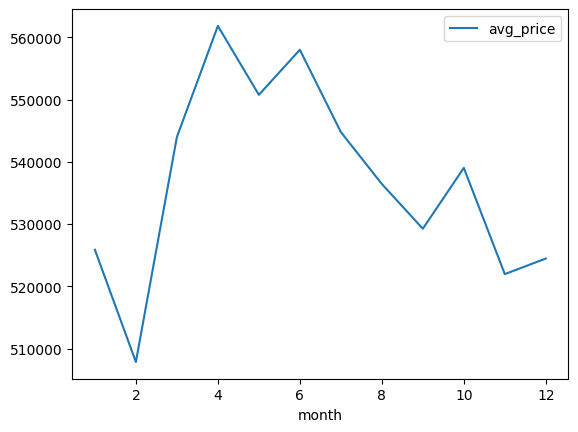

In [ ]:
monthAvgPriceTemp = df.groupby(by='month', as_index=False).mean()
monthAvgPrice = pd.DataFrame({'month':monthAvgPriceTemp['month'],'avg_price':monthAvgPriceTemp['price']})
print(monthAvgPrice)
monthAvgPrice.plot.line(x='month',y='avg_price')

## Dodatkowe zadania
  1. Jaka jest przyrost w sprzedaży pomiędzy kolejnymi dniami. Np. jeśli 07 marca sprzedano 100 domów, a 08 marca sprzedano 150 domów, to przyrost 08 marca wynosi 50 domów.
  2. Zagreguj dane tak aby pokazywały subaryczną tygodniową sprzedaż (podpowiedź użyj funkcji [resample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) )
  3. Napisz fragment kodu, który wybierze domy z każdego obszaru, których powierzchania jest mniejsza od średniej z tego obszaru
  4. Napisz funkcję, która określi czy w danym obszarze trend ilośći sprzedanych domów jest rosnacy lub malejacy (podpowiedź -- można użyć funkcji [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) oraz funkcji [linregres](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) i zwracanego przez nią parametru slope)

In [57]:
###zad1###
groupedByDate = df.groupby(by='date', as_index=False).count()
monthAvgPrice = pd.DataFrame({'date': groupedByDate['date'],'increase':groupedByDate['id'].diff(),'value':groupedByDate['id']})

###zad2###

groupedByDate['date'] = pd.to_datetime(groupedByDate['date'],format='%Y-%m-%d')
groupedByDate.resample('W', on='date').sum()
weeklySumSale = pd.DataFrame({'date':groupedByDate['date'],'sum':groupedByDate['bathrooms']})
print(weeklySumSale)

###zad3###




          date  sum
0   2014-05-02   67
1   2014-05-03    4
2   2014-05-04    5
3   2014-05-05   84
4   2014-05-06   83
..         ...  ...
367 2015-05-13   31
368 2015-05-14   11
369 2015-05-15    1
370 2015-05-24    1
371 2015-05-27    1

[372 rows x 2 columns]
